
# Avaliação 3_1 - Integração Numérica
Autor: Gabriel B. Melandes

Curso: Ciência da Computação


## Propósito
Este <i>notebook</i> é referente a avaliação3_1 da disciplina de Cálculo Numérico.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Funções</h3>

In [2]:
def int_trapezios_simples(F, a, b):
    integral = ((F(a)+F(b))/2)*((b-a)/2)
    return integral

def int_trapezios(F, a, b, n):  # F = função
    h = float(b-a)/n
    integral = 0.5*F(a) + 0.5*F(b)
    for i in range(1, n):
        integral += F(a + i*h)
    return integral*h

def erro_trapezios(F, a, b, n):  # F = 2ª derivada
    error = -(((b - a)**3)/(12*n**2))*F(1)
    #print('Erro da regra dos trapézios: {:.3e}'.format(error))
    return error

In [3]:
def int_simpson(F, a, b, n):  # F = função
    h = (b-a)/(3*n)
    integral = F(a)+F(b)
    for i in range(1, n):
        if (i % 2 == 1):
            integral += 4*F(a+(i*(b-a)/n))
        else:
            integral += 2*F(a+(i*(b-a)/n))
    return integral*h

def erro_simpson(F, a, b, n):  # F = 4ª derivada
    error = abs(F(b))*(((b-a)**5)/2880)
    return error

<b>1.</b>  Para cada uma das integrais abaixo, descreva o erro cometido na Regra dos Trapézios e na Regra de Simpson e calcule uma estimativa máxima para este erro.

\begin{align}
\textrm{(a) }\int_{0}^{1} e^{-x^2}dx &\quad \textrm{(b) }\int_{0}^{1}\frac{x^2}{x + 1}dx
\end{align}

In [4]:
def F1(x):
    return np.exp(-(x**2))

def F2(x): 
    return (x**2)/(x+1)

def F1_2nd_deri(x):
    return (4*x**2-2)*np.exp(-(x**2))

def F1_4th_deri(x):
    return (16*x**4-48*x**2+12)*np.exp(-(x**2))

def F2_2nd_deri(x):
    return 2/(x**3+3*x**2+3*x+1)

def F2_4th_deri(x):
    return 24/(x**5+5*x**4+10*x**3+10*x**2+5*x+1)

In [5]:
# Questão 1_ItemA
print('Área da Função 1 por integração trapezoidal simples: {: .5f}'.format
      ((int_trapezios_simples(F1, 0, 1))))
print('\tErro da regra dos trapézios: {: .3e}.'.format
      (erro_trapezios(F1_2nd_deri, 0, 1, 1)))
print('Área da Função 1 por integração de Simpson: {: .5f}'.format
      ((int_simpson(F1, 0, 1, 2))))
print('\tErro da regra de Simpson: {: .5f}'.format
      (erro_simpson(F1_4th_deri, 0, 1, 1)))

Área da Função 1 por integração trapezoidal simples:  0.34197
	Erro da regra dos trapézios: -6.131e-02.
Área da Função 1 por integração de Simpson:  0.74718
	Erro da regra de Simpson:  0.00255


In [6]:
# Questão 1_ItemB
print('Área da Função 2 por integração trapezoidal simples: {: .5f}'.format
      ((int_trapezios_simples(F2, 0, 1))))
print('\tErro da regra dos trapézios: {: .3e}.'.format
      (erro_trapezios(F2_2nd_deri, 0, 1, 1)))
print('Área da Função 2 por integração de Simpson: {: .5f}'.format
      ((int_simpson(F2, 0, 1, 2))))
print('\tErro da regra de Simpson: {: .5f}'.format
      (erro_simpson(F2_4th_deri, 0, 1, 2)))

Área da Função 2 por integração trapezoidal simples:  0.12500
	Erro da regra dos trapézios: -2.083e-02.
Área da Função 2 por integração de Simpson:  0.19444
	Erro da regra de Simpson:  0.00026


<hr>
<b>2.</b> Considere a seguinte integral $$ \int_{0}^{2}\frac{1}{(x-1)^2}dx\tag{1}$$

(a) Calcule a aproximação via Regra dos Trapézios

(b) Para n = 5, calcule a aproximação via Regra dos Trapezios Repetida.

(c) Qual é o prolema em tentar calcular esta integral?

(d) O que acontece com o erro na aproximação?

In [7]:
def F(x):  # =arctan(x)
    return 1/((x-1)**2)


def F_deri(x):
    return 1/2*np.log(x**2+1)

In [8]:
# Questão_2_itemA
print('Área da Função 5: {:.5f}.\n\tErro da regra dos trapézios: {:.3e}'.
      format(int_trapezios(F, 0, 2, 2), erro_trapezios(F_deri, 0, 2, 2)))
print('\tComprando valor real com o encontrado: {:e}'.format(abs(
    int_trapezios(F, 0, 2, 2)-np.arctan(2))))

ZeroDivisionError: float division by zero

Não foi possível calcular utilizando apenas a regra dos trapezios $(n = 2)$, quando chegar em $F(1)$ teremos divisão por zero, conforme exibido.

In [9]:
# Questão_2_itemB
print('Área da Função 3: {:.5f}.\n\tErro da regra dos trapézios: {:.3e}'.
      format(int_trapezios(F, 0, 2, 5), erro_trapezios(F_deri, 0, 2, 5)))
print('\tComprando valor real com o encontrado: {:e}'.format(abs(
    int_trapezios(F, 0, 2, 5)-np.arctan(2))))

Área da Função 3: 22.62222.
	Erro da regra dos trapézios: -9.242e-03
	Comprando valor real com o encontrado: 2.151507e+01


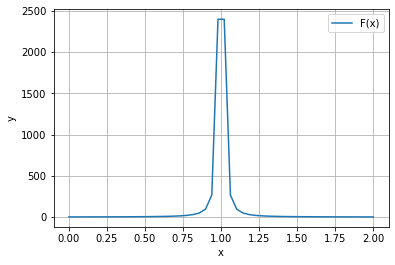

In [10]:
x = np.linspace(0, 2, 50)
plt.plot(x, F(x),label='F(x)')
#plt.plot(.999,F(.999),'o',label='não continuidade')
plt.grid(); plt.legend(); 
plt.xlabel('x'); plt.ylabel('y')
plt.show()

Como pode ser visto no gráfico, esse salto de um pequeno intervalo menor do que 1 para maior que 1 representa a não continuidade no ponto $x = 1$. Outra forma é removendo o comentário e colocando um valor proximo de 1 nas casas decimais, ex: $\left(1-\frac{1}{1000}\right)$.

<hr>
<b>3.</b> Considerando os métodos de integração repetida, determine $n$ de modo que a integral:
$$\int_{0}^{\pi}sin(x)dx.\tag{2} $$
seja aproximada com erro menor que $10^{-4}$ para a:

(a) Regra dos Trapézios Repetida

(b) Regra de Simpson Repetida

Integrando a função 2 temos: 
$$
\int_{0}^{\pi}sin(x)dx = \left[-cos(x)\right]_{0}^{\pi} = 2 \tag{3}
$$

In [11]:
def F(x):
    return np.sin(x)

In [12]:
# Q3_item_A
for i in range(1, 1000):
    if (abs(2 - int_trapezios(F, 0, np.pi, i)) < 1e-4):
        print('Mínimo para o erro ser 10^(-4) = {:}'.format(i))
        break

Mínimo para o erro ser 10^(-4) = 129


In [13]:
# Q3_item_B
for i in range(1, 1000):
    if (abs(2 - int_simpson(F, 0, np.pi, i)) < 1e-4):
        print('Mínimo para o erro ser 10^(-4) = {}'.format(i))
        break

Mínimo para o erro ser 10^(-4) = 12
